In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openai_client import OpenAIClient
from IPython.core.interactiveshell import InteractiveShell

In [2]:
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
products_json = json.load(open('data/final_products_data.json'))

In [4]:
products_df = pd.DataFrame(products_json["products"][0].items(), columns=["id", "raw_data"])
products_df["raw_length"] = products_df["raw_data"].apply(lambda x: len(x.split()))

In [5]:
products_df.tail(3)

,id,raw_data,raw_length
4124,WAFER-ULT5-i3-R10,w w w e w r l c Single Board Computer Embedded Board SBC supports Intel th Generation Whiskey Lake processor DDR SODIMM Triple display dual HDMI LVDS Triple GbE USB Gen M A key mPCIe mSATA support SATA Gbs COM RoHS SoC th generation Intel mobile ULT Processor Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Dualcore MB cache TDPW Intel Celeron processor UE GHz Dualcore MB cache TDPW Intel Celeron processor U GHz Dualcore MB cache TDPW BIOS AMI UEFI BIOS Memory x DDR MHz SODIMM support GB Graphics Engine Intel UHD Graphics Display Output Triple Independent Displays x HDMI xHz x LVDS bit dualchannel LVDS CHB DP LVDS converter xHz Ethernet x Intel IAT colay I x PCIe GbE LAN Intel Controller Embedded Controller ITE ITVGFX External IO Interface x USB Gen Internal IO Interface x RS x pin P x RS x pin P Support Auto Flow Control RS x SATA Gs V SATA power connector x USB x pin P IC x IC x pin Audio x HD audio x pin support channel HD audio ACKITHDR Front Panel x Power LED HDD LED x pin x Power button x pin x Reset button x pin LAN LED x LAN LED x pin Expansion x Fullsize PCIe Mini slot w SATA signal support mSATA x M slot A Key Digital IO x bit digital IO x pin Fan Connector x Smart fan connector x pin Power Supply V DC input x Internal power connector x pin Support ATATX mode Watchdog Timer Software programmable support sec system reset Power Consumption VA Intel Core iUE GHz CPU GB MHz DDR memory Operating Temperature C C Storage Temperature C C Operating Humidity noncondensing Dimensions mm x mm Weight GW g NW g Specifications Ordering Information Part No Description WAFERULTiR SBC supports Intel th Generation Core iUE DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe mSATA support SATA Gbs COM RoHS WAFERULTiR SBC supports Intel th Generation Core iUE DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe mSATA support SATA Gbs COM RoHS WAFERULTiR SBC supports Intel th Generation Core iUE DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe mSATA support SATA Gbs COM RoHS WAFERULTCR SBC supports Intel th Generation Celeron UE DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe support SATA Gbs COM RoHS WAFERULTCER SBC supports Intel th Generation Celeron U DDR SODIMM triple display dual HDMI LVDS Triple GbE USB M A key mPCIe support SATA Gbs COM RoHS RS Round cable RS RS cable mm AWG A DSUB P MALEHEXAGONAL screw B MOLEX P Wins Precision RoHS RS SATA cable mm AWG SATA P female SATA P female LOCK JST PHR P one pcs PKG w label Wins Precision RoHS By order production MOQ Packing List x WAFERULT single board computer Heatspreader x Power cable x SATA power cable kit x RS cable x QIG Quick Installation Guide WAFERULT WAFERULTV SBC supports Intel th generation Whiskey Lake processor DDR SODIMMs Triple display dual HDMI LVDS selection M A Key PCIe Mini slot mSATA spport COM USB Gen SATA Gbs support Support temperature operation C C Support Auto Flow Control RS Features USB USBUSB SATA Gbs DDR PCIe GbEJumperless x USB Gen HDMI x LAN DDR MHz M A Key RS DIO SATAPCIe MiniUSB Audio RS Dimensions Unit mm LVDS Smart Home Fanless heatsink module Optional PN RS Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information IEI WAFERULTCER WAFERULTiR WAFERULTiR WAFERULTiR httpswwwmousercomiei httpswwwmousercomaccesspnWAFERULTCER httpswwwmousercomaccesspnWAFERULTiR httpswwwmousercomaccesspnWAFERULTiR httpswwwmousercomaccesspnWAFERULTiR,622
4125,WAFER-ULT5-i7-R10,w w w e w r l c Single Board Computer Embedded Board SBC supports Intel th Generation Whiskey Lake processor DDR SODIMM Triple display dual HDMI LVDS Triple GbE USB Gen M A key mPCIe mSATA support SATA Gbs COM RoHS SoC th generation Intel mobile ULT Processor Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Quadcore MB cache TDPW Intel Core iUE GHz GHz Du

In [6]:
# create a distribution of the raw data length
products_df["raw_length"].describe()

count     4127.00
mean      2543.96
std      16013.38
min          0.00
25%        558.00
50%        756.00
75%       1153.00
max     493591.00
Name: raw_length, dtype: float64

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Raw Data Length')

<Axes: title={'center': 'Distribution of Raw Data Length'}, xlabel='raw_length', ylabel='Count'>

Text(0.5, 0, 'Raw Data Length')

Text(0, 0.5, 'Count')

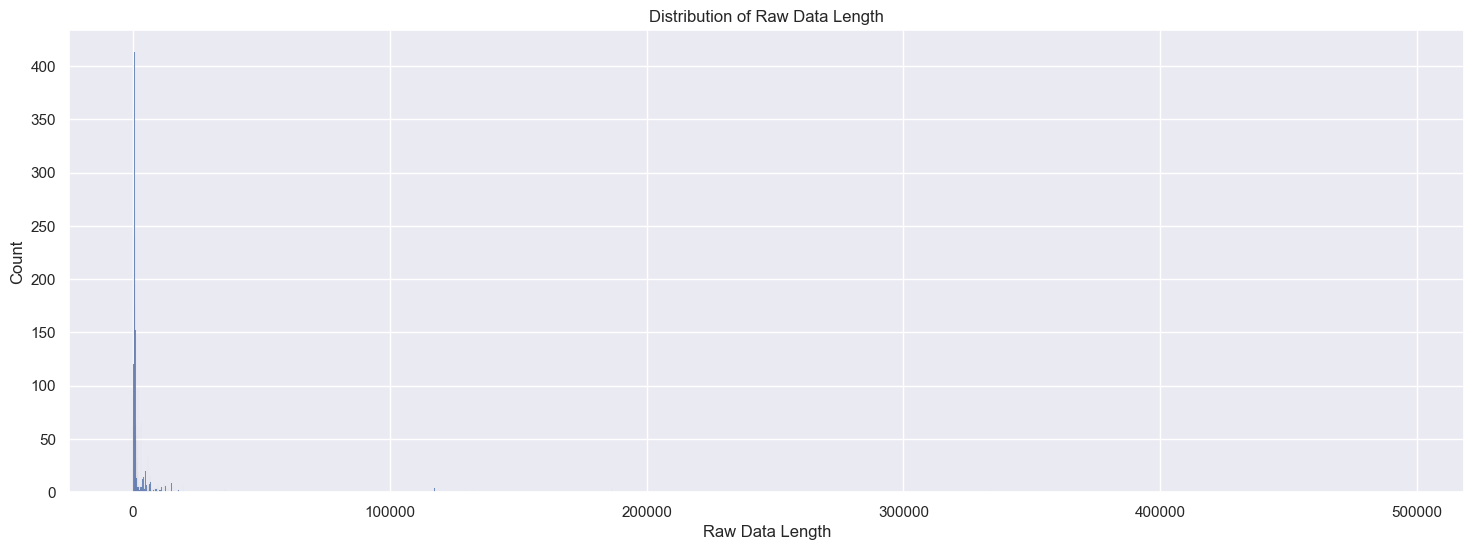

In [7]:
plt.figure(figsize=(18, 6))  # Increase width and height
plt.title("Distribution of Raw Data Length")  # Add a title
sns.histplot(products_df["raw_length"], edgecolor='black')  # Use histplot instead of displot
plt.xlabel("Raw Data Length")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.show()

In [8]:
x = products_df[products_df["raw_length"] < 250]
x.shape
x.tail(3)

(172, 3)

,id,raw_data,raw_length
4028,SB02-4940-0000-C1,DatasheetUDOO XII Main cloud services UDOO BRICKS UDOO BLU Arduino Leonardocompatible II II LEONARDO BIT Optional Depends version Development platform ARDUINO LEONARDOCOMPATIBLEII GB DDRL DUAL CHANNEL Gigabit Ethernet LAN interface M Key E slot optional Wireless modules x HDMI x mini DP RC IR interface mm x mm inch x inch Intel HD Graphics Up MHz execution units NETWORKING USB SATA connector M Key B SSD Slot Micro SD card slot VIDEO INTERFACE GRAPHICS MULTIMEDIA AUDIO IR OTHER INTERFACES OPERATING SYSTEM DIMENSIONS PROCESSOR CORES MEMORY FEATURES Arduino Leonardo Microcontroller GHZ INTEL PENTIUM N UDOO X UDOO X GHZ INTEL CELERON N GB DDRL DUAL CHANNEL GB GB MASS STORAGE Intel HD Graphics Up MHz execution units HD audio codec ALC CG MicrophoneHeadphone combo connector Preamplified speaker output SPDIF output HW Video decode HHEVC H MPEG MVC VC WMV JPEG VP VP HW Video encode H MVC JPEG Up GPIOs x IC x UART LPC SDIO Touch Screen signals external pin headers The communication Braswell SoC ATmegaU Microcontroller goes internal USB interface like Arduino Leonardo boards connect external PCs V compliant x USB typeA sockets ATmegaU UART x iC x SPI Arduino Leonardocompatible Up x digital IO PWM x Analog input Microcontroller Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information UDOO SBC SBC SBC SBC httpswwwmousercomudoo httpswwwmousercomaccesspnSBC httpswwwmousercomaccesspnSBC httpswwwmousercomaccesspnSBC httpswwwmousercomaccesspnSBC,222
4035,SC0563,Allegro ZHeight ZHeight ZHeight ZHeight ZHeight Z He ig ht Z He ig ht Z He ig ht Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information Raspberry Pi SC httpswwwmousercomraspberrypi httpswwwmousercomaccesspnSC,34
4062,uATX-RYZEN,uATXSeriesDatasheetindd Mouser Electronics Authorized Distributor Click View Pricing Inventory Delivery Lifecycle Information GIGAIPC uATXRYZEN httpswwwmousercomgigaipc httpswwwmousercomaccesspnuATXRYZEN,16


In [9]:
x.to_csv("data/less_than_250.csv", index=False)

In [10]:
products_df[products_df["raw_length"] > 50000].shape

(18, 3)

In [8]:
products_df = products_df[products_df["raw_length"] > 250]
products_df = products_df[products_df["raw_length"] < 50000]

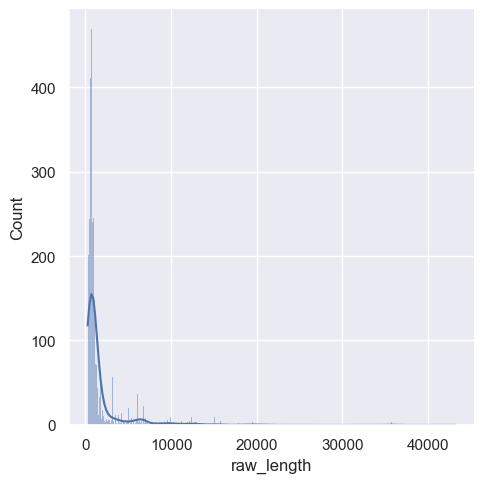

In [9]:
sns.displot(products_df["raw_length"], kde=True)

In [10]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 0 to 4126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3937 non-null   object
 1   raw_data    3937 non-null   object
 2   raw_length  3937 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 123.0+ KB


In [11]:
# sort products by raw data length
products_df = products_df.sort_values(by="raw_length", ascending=False)

In [12]:
client = OpenAIClient()

In [13]:
print(products_df.head(5)["raw_data"].values[0])
print(products_df.head(5)["raw_length"])

Stratix Device Handbook Volume Innovation Drive San Jose CA httpwwwalteracom Stratix Device Handbook Volume SV httpwwwalteracom Copyright Altera Corporation All rights reserved Altera The Programmable Solutions Company stylized Altera logo specific device des ignations words logos identified trademarks andor service marks unless noted otherwise trademarks service marks Altera Corporation US countries All product service names property respective holders Al tera products protected numerous US foreign patents pending applications maskwork rights copyrights Altera warrants performance semiconductor products current specifications accordance Alteras standard warranty reserves right make changes products services time without notice Altera assumes responsibility liability arising ap plication use information product service described herein except expressly agreed writing Altera Corporation Altera customers advised obtain latest version device specifications relying published formation plac

In [17]:
result = client.extract_data(products_df.head(5)["raw_data"].values[0])
result

'```json\n{\n    "name": "Stratix Device Handbook Volume",\n    "size": "Not available",\n    "form": "Not available",\n    "processor": "Not available",\n    "core": "Not available",\n    "frequency": "Not available",\n    "memory": "Not available",\n    "voltage": "Not available",\n    "io": "Not available",\n    "thermal": "Not available",\n    "feature": "Not available",\n    "type": "Not available",\n    "specification": "Not available",\n    "manufacturer": "Altera Corporation",\n    "location": "Innovation Drive, San Jose, CA",\n    "description": "The Stratix Device Handbook provides comprehensive information on Altera\'s Stratix family of devices, including features, architecture, configuration, and technical specifications.",\n    "summary": "Comprehensive guide to Altera\'s Stratix family of devices, detailing features, architecture, and technical specifications."\n}\n```'

In [18]:
x = result.replace("```", "").replace("json", "").replace("\n", "").strip()
x

'{    "name": "Stratix Device Handbook Volume",    "size": "Not available",    "form": "Not available",    "processor": "Not available",    "core": "Not available",    "frequency": "Not available",    "memory": "Not available",    "voltage": "Not available",    "io": "Not available",    "thermal": "Not available",    "feature": "Not available",    "type": "Not available",    "specification": "Not available",    "manufacturer": "Altera Corporation",    "location": "Innovation Drive, San Jose, CA",    "description": "The Stratix Device Handbook provides comprehensive information on Altera\'s Stratix family of devices, including features, architecture, configuration, and technical specifications.",    "summary": "Comprehensive guide to Altera\'s Stratix family of devices, detailing features, architecture, and technical specifications."}'

In [19]:
parsed_result = json.loads(x)
parsed_result

{'name': 'Stratix Device Handbook Volume',
 'size': 'Not available',
 'form': 'Not available',
 'processor': 'Not available',
 'core': 'Not available',
 'frequency': 'Not available',
 'memory': 'Not available',
 'voltage': 'Not available',
 'io': 'Not available',
 'thermal': 'Not available',
 'feature': 'Not available',
 'type': 'Not available',
 'specification': 'Not available',
 'manufacturer': 'Altera Corporation',
 'location': 'Innovation Drive, San Jose, CA',
 'description': "The Stratix Device Handbook provides comprehensive information on Altera's Stratix family of devices, including features, architecture, configuration, and technical specifications.",
 'summary': "Comprehensive guide to Altera's Stratix family of devices, detailing features, architecture, and technical specifications."}

In [14]:
# select product from index 1111 to 1800
products_df = products_df.iloc[1111:1800]

In [15]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 241 to 1005
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          689 non-null    object
 1   raw_data    689 non-null    object
 2   raw_length  689 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


In [20]:
# randomly select 100 products from products_df
# products = products_df.sample(100, random_state=42)
# products.head(1)

In [21]:
# sns.displot(products["raw_length"], kde=True)

In [16]:
extracted_data = []
raw_extracted_data = []
i = 0

for header, subheader in products_df[["id", "raw_data"]].values:
    result = client.extract_data(subheader)
    x = result.replace("```", "").replace("json", "").replace("\n", "").strip()
    try:
        parsed_result = json.loads(x)
        parsed_result["id"] = header
        extracted_data.append(parsed_result)
    except:
        raw_extracted_data.append(result)
    i += 1
    if i % 100 == 0:
        print(f"Processed {i} products")

# extracted_data

Processed 100 products
Processed 200 products
Processed 300 products
Processed 400 products
Processed 500 products
Processed 600 products


In [17]:
len(extracted_data)
len(raw_extracted_data)

687

2

In [ ]:
# raw_extracted_data

['```json\n{\n    "name": "Advantech AIMB-275G2-00A1E",\n    "size": "170 x 170 mm",\n    "form": "Mini-ITX",\n    "processor": "Intel Core i5-4300U, Intel Core i3-4010U, Intel Celeron 2980U",\n    "core": "Dual core",\n    "frequency": "1.9 GHz, 1.7 GHz, 1.6 GHz",\n    "memory": "Dual Channel DDR3L 1600 MHz, Max Capacity 16 GB (8 GB per SODIMM), 2 x 204-pin SODIMM, Non-ECC",\n    "voltage": "Single voltage 12V DC input",\n    "io": "Multiple display I/O supports versatile Tri display functions (eDP/LVDS, DP/HDMI, DP), Realtek ALC892 supports 5.1 channel HD audio, Dual Realtek RTL8111E Gigabit LAN, Full-sized MiniPCIe, Half-sized MiniPCIe, 6 x COM, 2 x SATA III, 1 x mSATA, 4 x USB 3.0, 6 x USB 2.0",\n    "thermal": "Fanless Heat Sink, Fan Cooler, Heat Pipe Cooling Module",\n    "feature": "Supports Intel Core i5/i3/Celeron ULT processors, Multiple display I/O, Dual Realtek Gigabit LAN, Full-sized and Half-sized MiniPCIe slots, Wide range of I/O interfaces",\n    "type": "Industrial Mot

In [18]:
extracted_data_df = pd.DataFrame(extracted_data)
extracted_data_df.head(1)

,name,size,form,processor,core,frequency,memory,voltage,io,thermal,feature,type,specification,manufacturer,location,description,summary,id
0,COMebDV,Not available,COM Express Basic Type,Intel Atom C SoC,Not available,Not available,"2 x DDR SODIMM, 8 GByte ECC/non-ECC","ATX 12V, 5V Wide Range Single Supply Power","Up to 4 x USB 3.0, 4 x USB 2.0, 4 x PCIe lanes, 4 x SATA 6 Gbps, 4 x GbE Interfaces","Commercial grade: 0°C to 60°C, Industrial grade: -40°C to 85°C","Quad GbE interfaces, High-speed connectivity, PCIe, SATA, USB, Industrial grade versions",Computer on Modules,"COM Express Basic Pinout Type, Intel Atom Processor C3338, C3558, C3758, C3958, 8 GByte DDR4 SODIMM, ECC/non-ECC, Intel I210IT Ethernet Controller, Up to 4 x SATA 6 Gbps, eMMC 8 GByte SLC/64 GByte MLC, PCIe Gen3 lanes, USB 3.0/2.0, TPM, ACPI, AMI UEFI BIOS, Linux, Windows Server",Kontron,"Kontron Europe GmbH, Gutenbergstraße 2, 85737 Ismaning, Germany","Entry-level server-grade platform with Intel Atom C SoC processors, offering high-speed connectivity and industrial-grade versions.","The COMebDV is a COM Express Basic Type module featuring Intel Atom C SoC processors, designed for entry-level server-grade applications with high-speed connectivity and industrial-grade options.",68007-0000-99-1C01


In [19]:
products = products_df.merge(extracted_data_df, on="id", how="left")
products.head(1)

id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [20]:
products.to_csv("data/clean_products_2.csv", index=False)

In [21]:
# vertical stack clean_products_1 and clean_products_2
clean_products_1 = pd.read_csv("data/clean_products_1.csv")
clean_products_2 = pd.read_csv("data/clean_products_2.csv")

clean_products = pd.concat([clean_products_1, clean_products_2], axis=0)
clean_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4626 entries, 0 to 688
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4626 non-null   object
 1   raw_data       4626 non-null   object
 2   raw_length     4626 non-null   int64 
 3   name           1798 non-null   object
 4   size           1798 non-null   object
 5   form           1798 non-null   object
 6   processor      1798 non-null   object
 7   core           1798 non-null   object
 8   frequency      1798 non-null   object
 9   memory         1798 non-null   object
 10  voltage        1798 non-null   object
 11  io             1798 non-null   object
 12  thermal        1798 non-null   object
 13  feature        1798 non-null   object
 14  type           1798 non-null   object
 15  specification  1798 non-null   object
 16  manufacturer   1798 non-null   object
 17  location       1798 non-null   object
 18  description    1798 non-null   obj

In [22]:
save_path = "data/clean_products.csv"
clean_products.to_csv(save_path, index=False)